In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [20]:
def plotdisplots(col):
    plt.figure(figsize=(15,5))
    sn.histplot(x=df['BodyFat'], color='magenta',label='Bodyfat',kde=True,fill=True)
    sn.histplot(x=df[col], color='red',label=col, kde=True,fill=True)
    plt.legend()
    plt.show()

Distribution plots for Density feature is : 


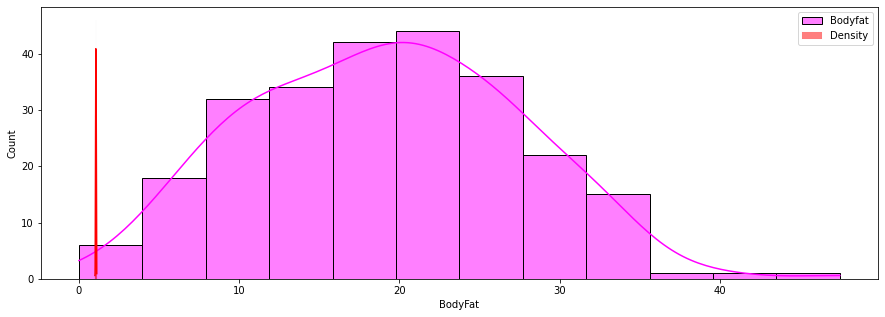

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is : 


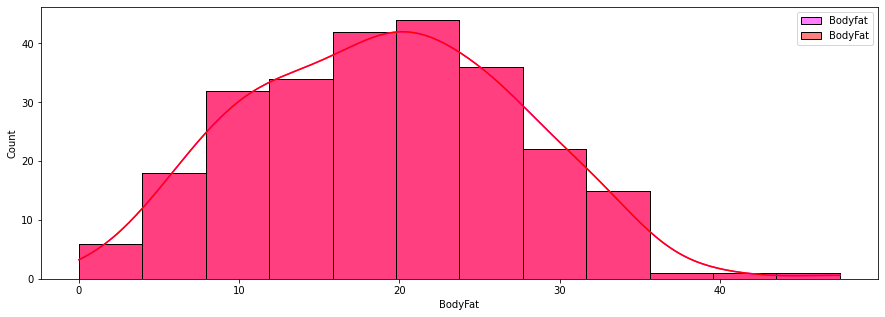

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is : 


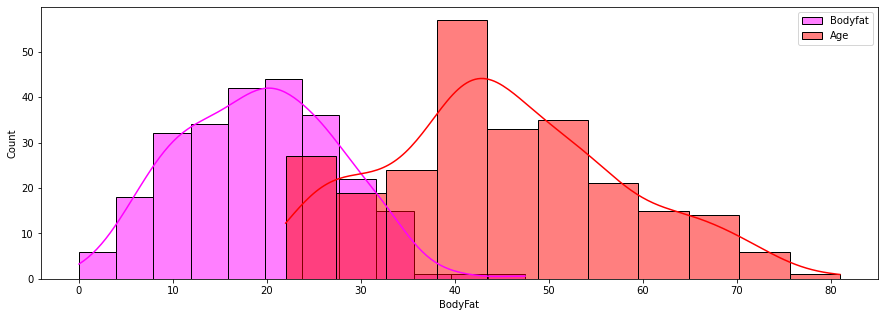

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is : 


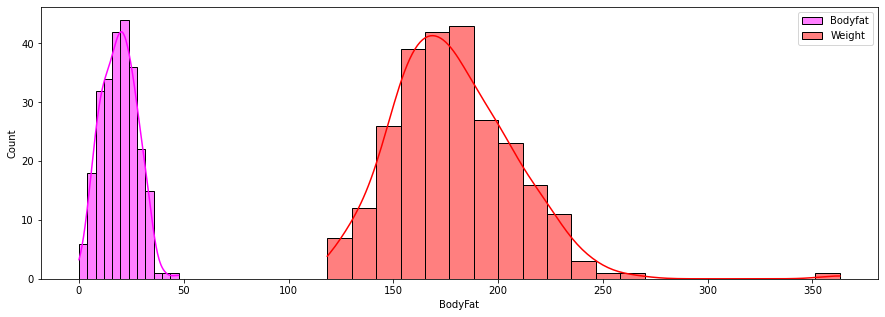

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is : 


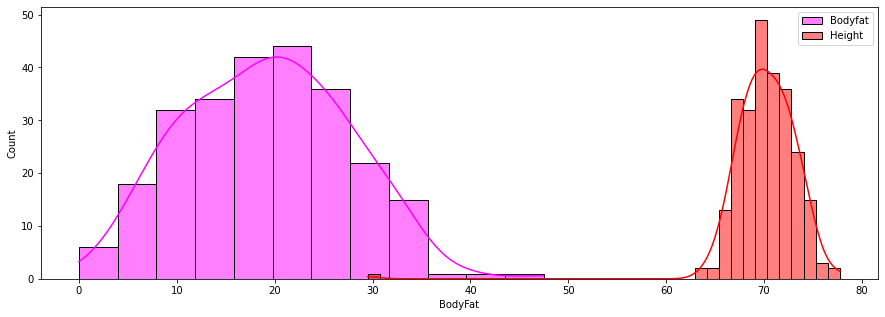

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is : 


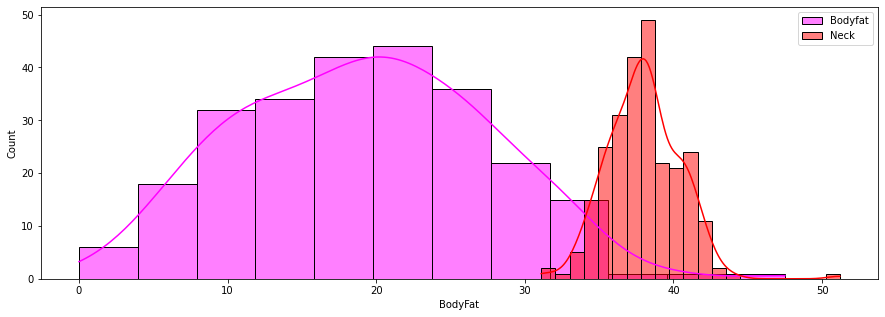

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is : 


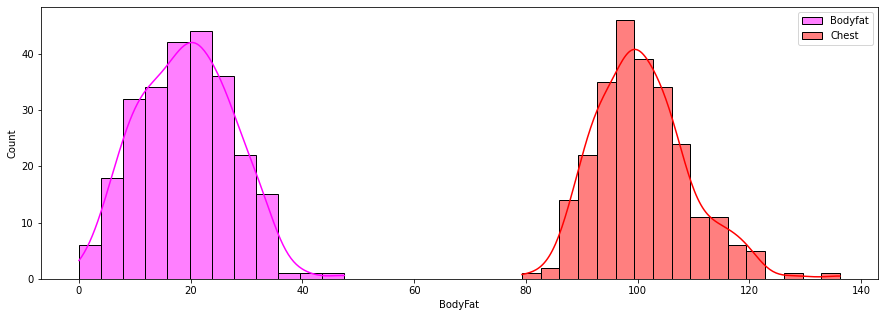

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is : 


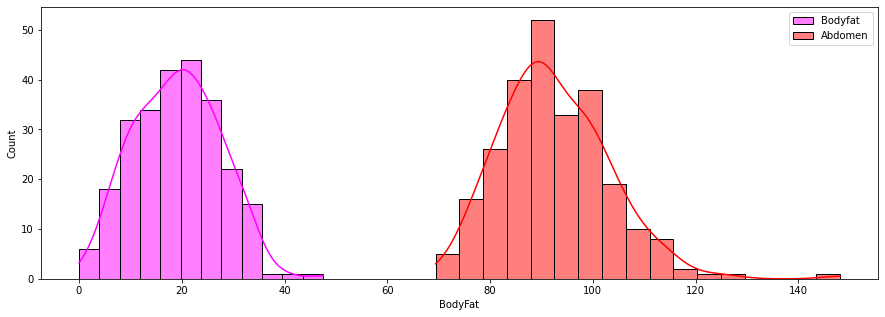

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is : 


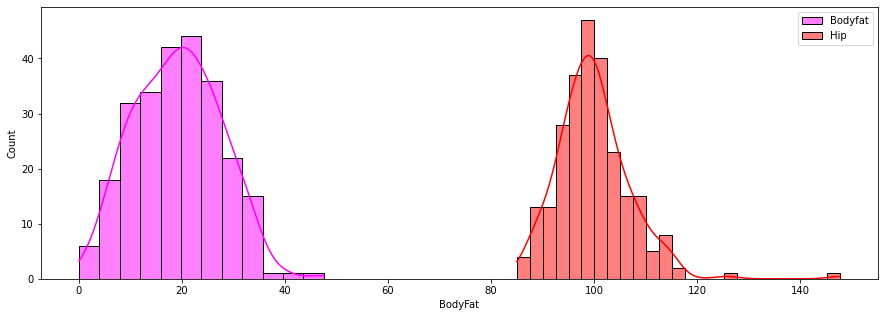

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is : 


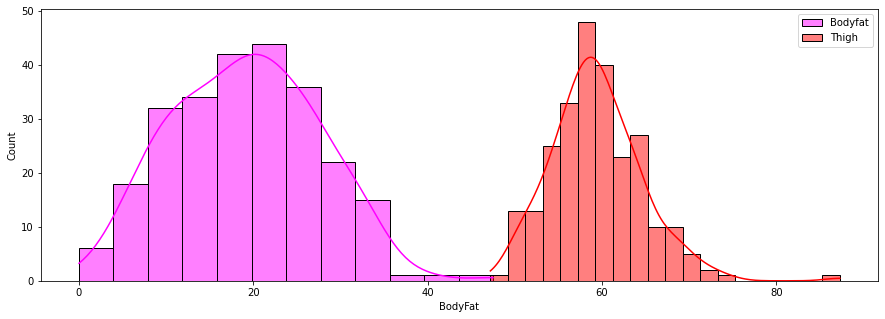

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is : 


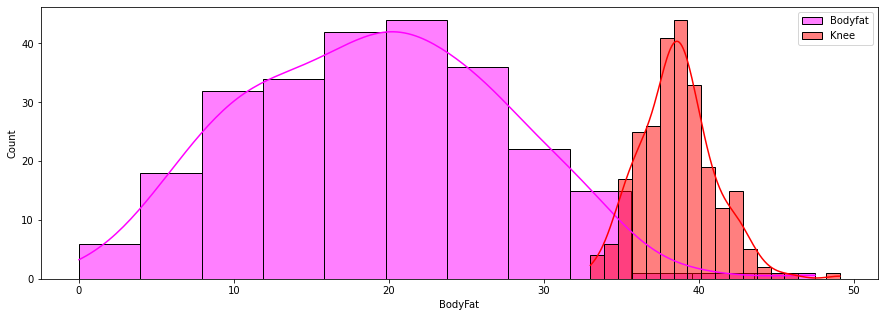

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is : 


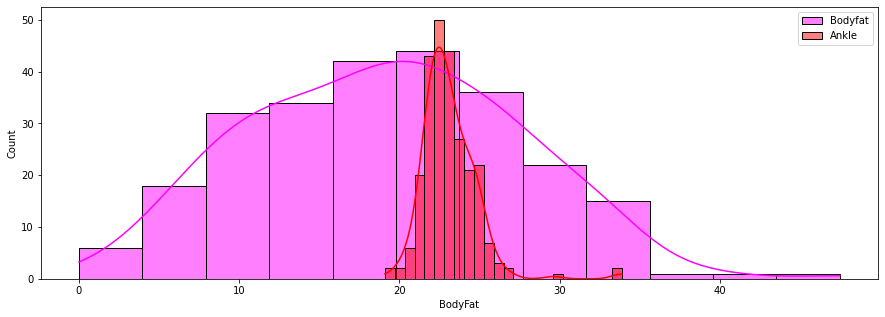

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is : 


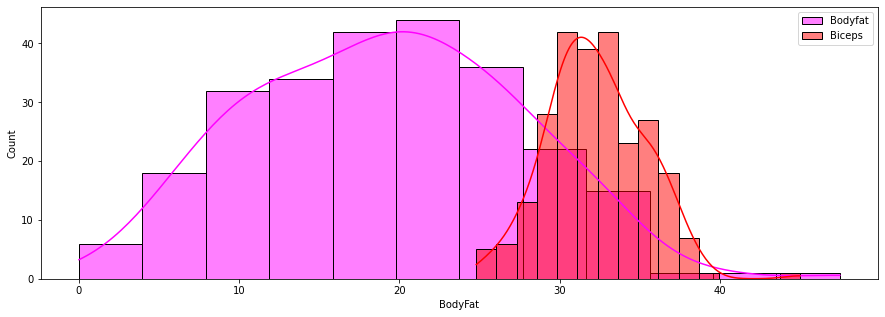

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is : 


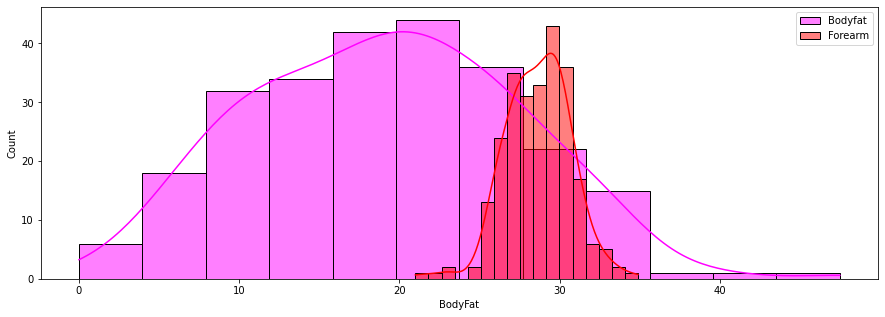

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is : 


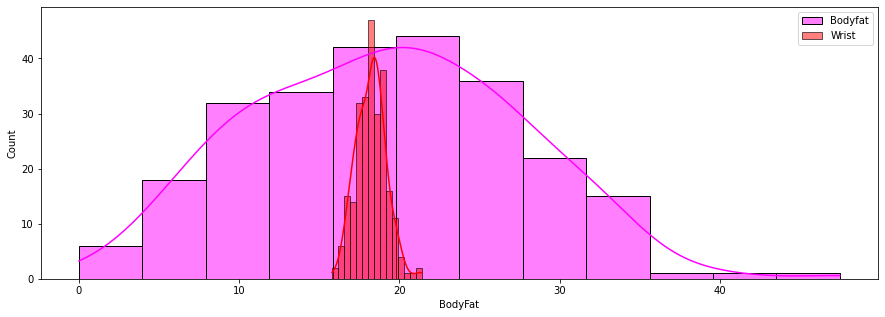

----------------------------------------------------------------------------------------------------


In [21]:
cols = list(df.columns)
for i in cols:
    print(f'Distribution plots for {i} feature is : ')
    plotdisplots(i)
    print("-"*100)

In [24]:
import scipy.stats as stats

In [25]:
def drawplots(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')

    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)

    plt.subplot(1,3,3)
    sn.boxplot(x=df[col],color='magenta')

    plt.show()


Distribution plots for the feature Density are shown 


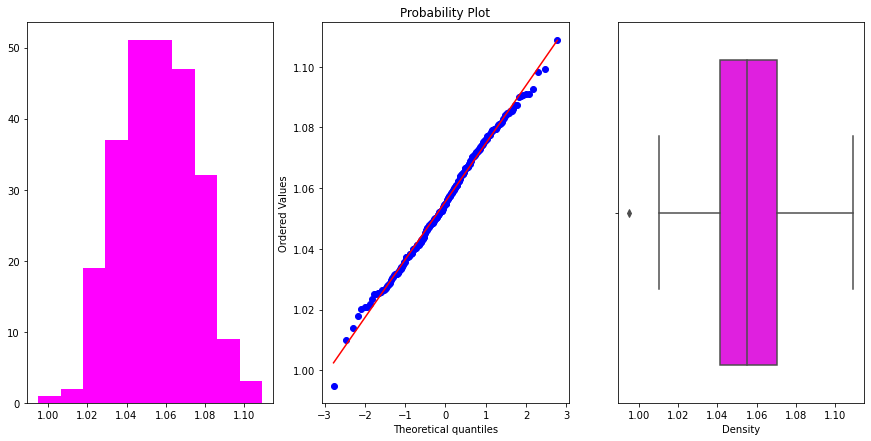

Distribution plots for the feature BodyFat are shown 


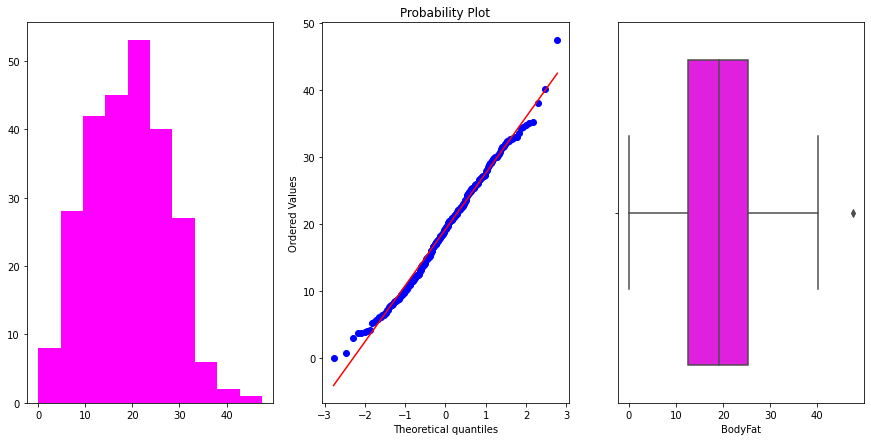

Distribution plots for the feature Age are shown 


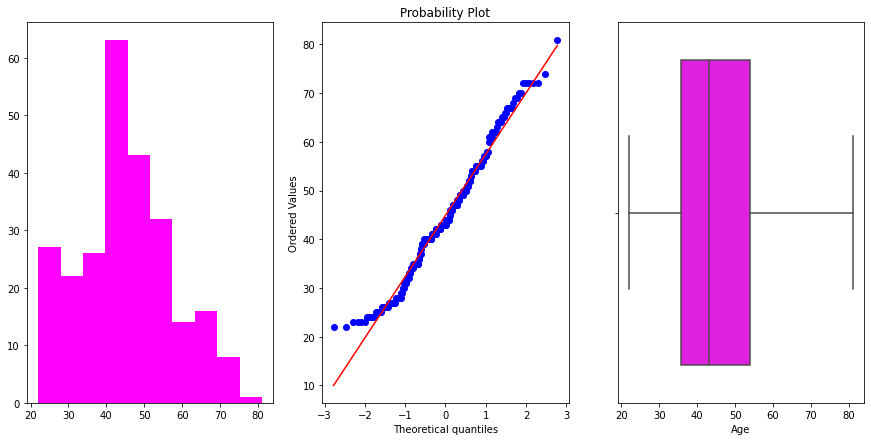

Distribution plots for the feature Weight are shown 


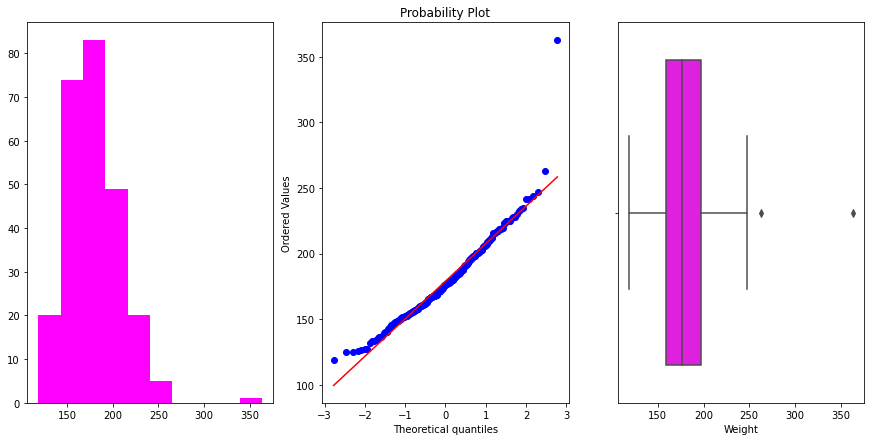

Distribution plots for the feature Height are shown 


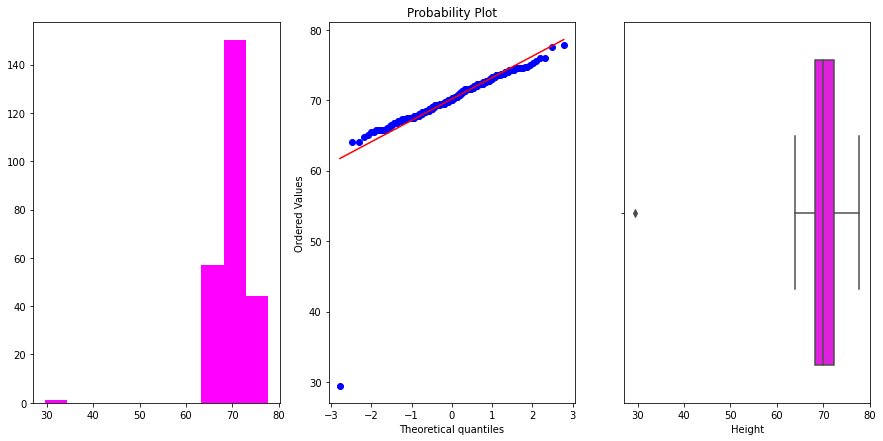

Distribution plots for the feature Neck are shown 


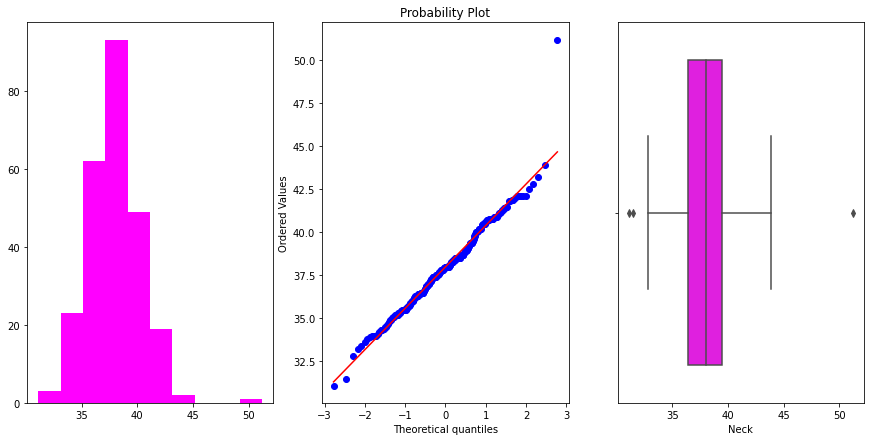

Distribution plots for the feature Chest are shown 


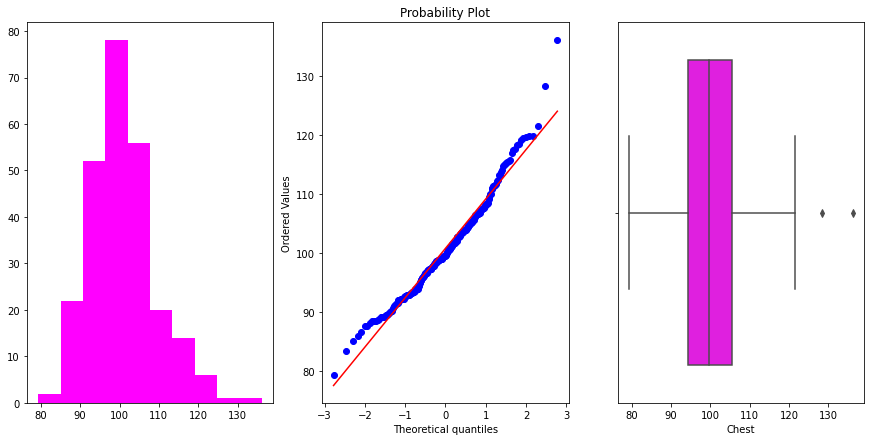

Distribution plots for the feature Abdomen are shown 


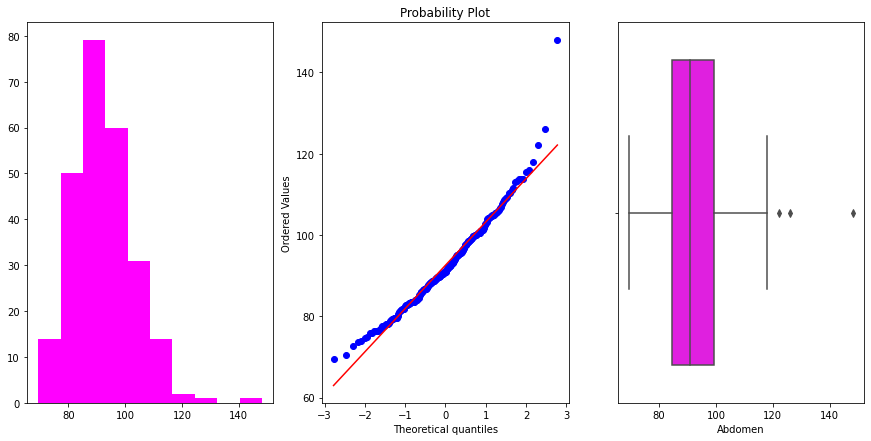

Distribution plots for the feature Hip are shown 


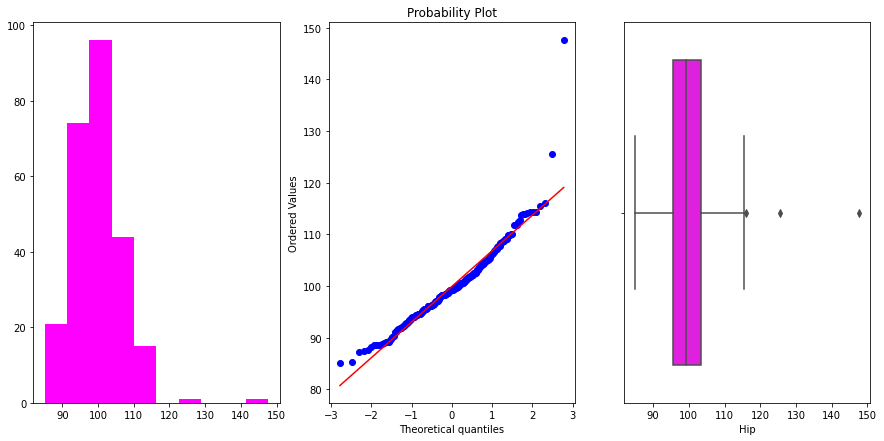

Distribution plots for the feature Thigh are shown 


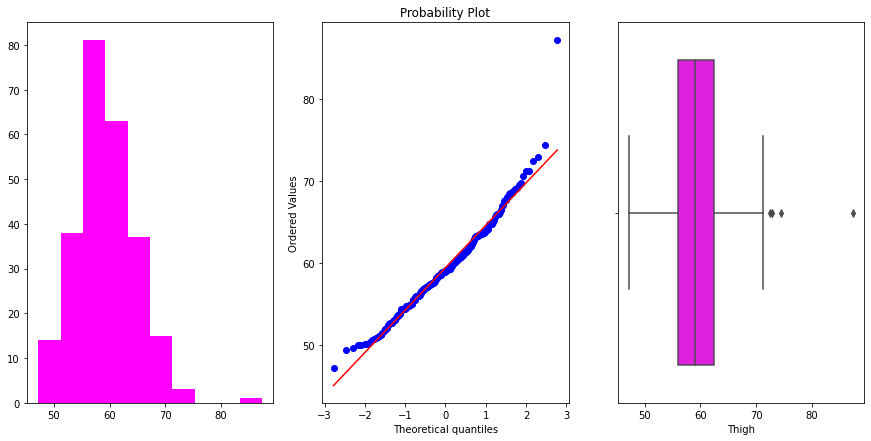

Distribution plots for the feature Knee are shown 


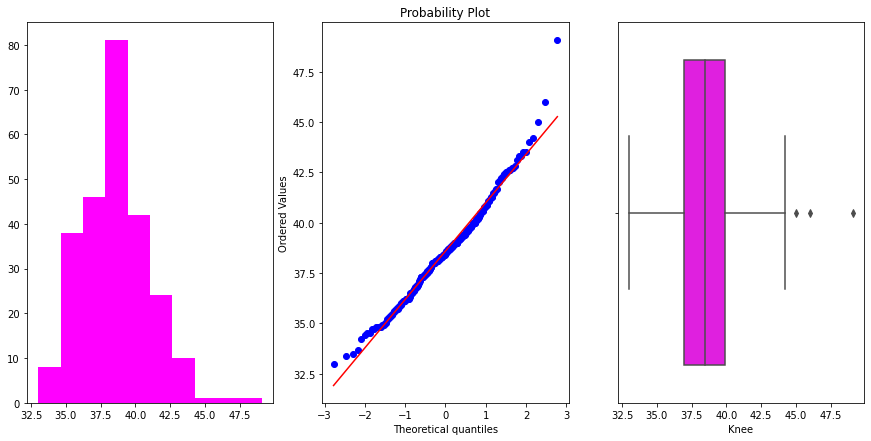

Distribution plots for the feature Ankle are shown 


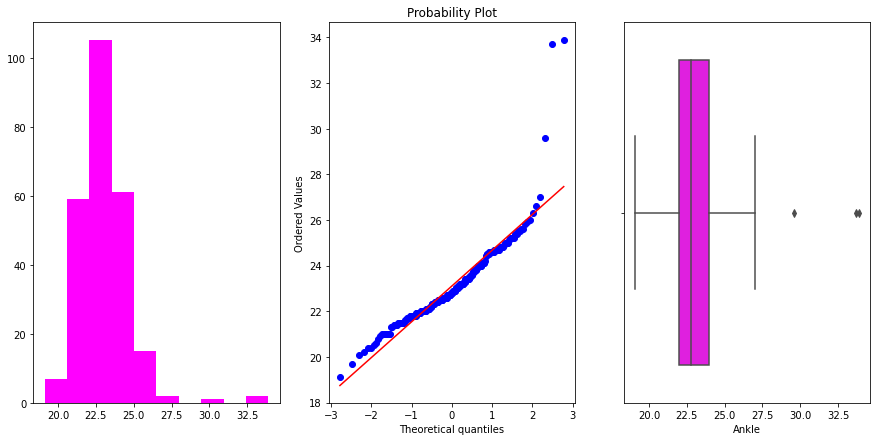

Distribution plots for the feature Biceps are shown 


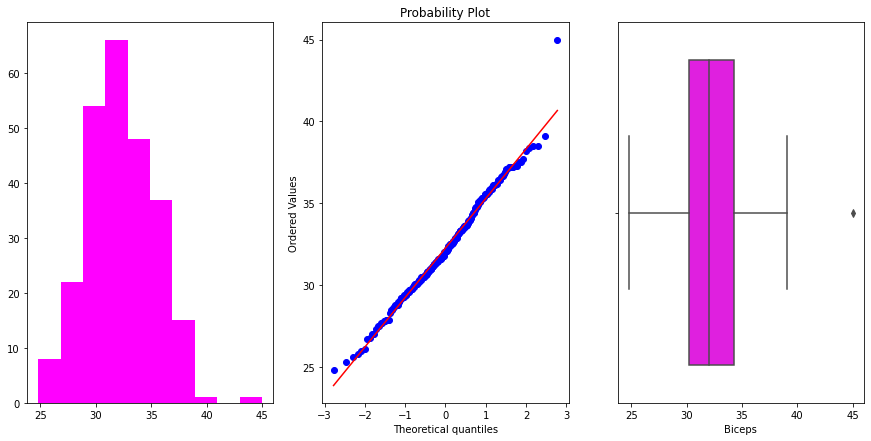

Distribution plots for the feature Forearm are shown 


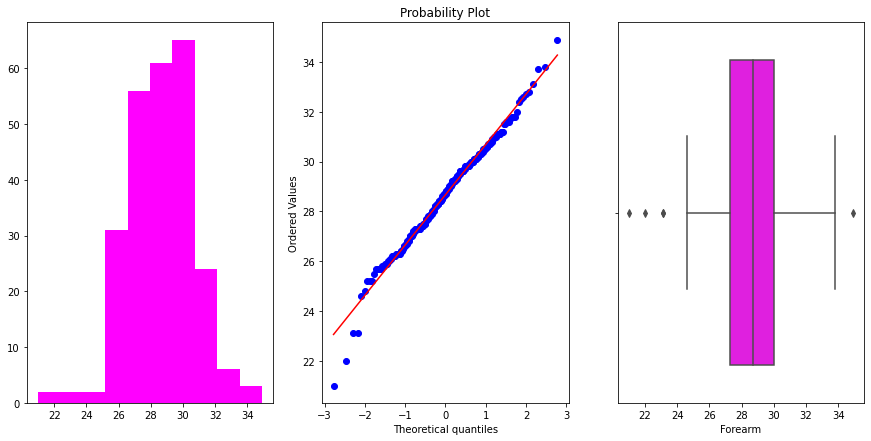

Distribution plots for the feature Wrist are shown 


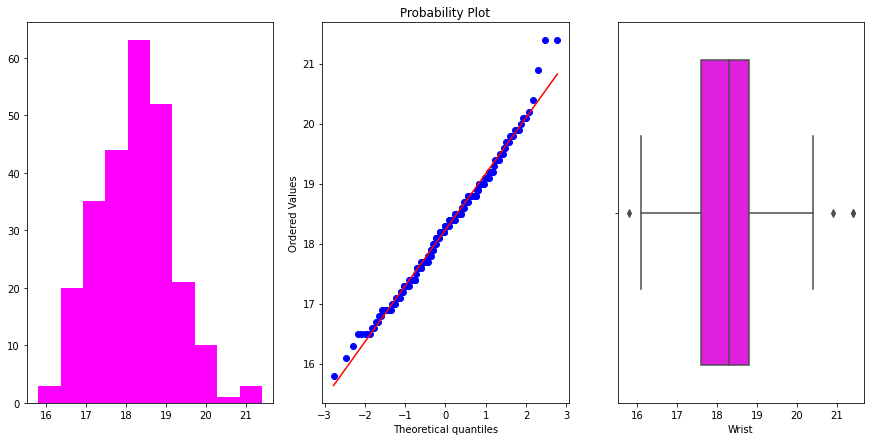

In [26]:
cols = list(df.columns)
for i in range(len(cols)):
    print(f'Distribution plots for the feature {cols[i]} are shown ')

    drawplots(df,cols[i])

    print("="*100)

# Checking the outliers

In [38]:
upperlimit = []
lowerlimit = []
for i in cols:
    upperlimit.append(df[i].mean()+(df[i].std())*4)
    lowerlimit.append(df[i].mean()-(df[i].std())*4)

In [39]:
j=0
for i in cols:
    temp = df.loc[(df[i]>upperlimit[j])&(df[i]<lowerlimit[j])]
    j+=1

In [40]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


# Using Extra Trees Regressor for Feature Selection

In [43]:
data = df.copy()
test = data['BodyFat']
train = data.drop(columns=['BodyFat'], axis=1)

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

In [46]:
er.feature_importances_

array([7.56586281e-01, 1.97353959e-03, 2.40304796e-02, 2.92285337e-03,
       3.80949422e-03, 5.73724862e-02, 1.16681702e-01, 1.83299831e-02,
       4.20776289e-03, 4.07127819e-03, 6.37134069e-04, 6.62632296e-03,
       7.30071010e-04, 2.02061153e-03])

<AxesSubplot:>

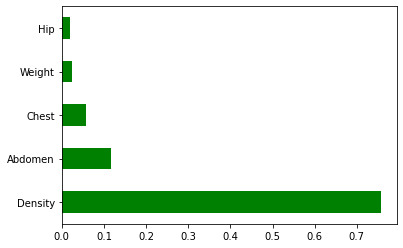

In [48]:
series = pd.Series(er.feature_importances_,index=train.columns)
series.nlargest(5).plot(kind='barh',color='green')

# Using Mutual information Gain for feature selection

In [49]:
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(train,test)

<AxesSubplot:>

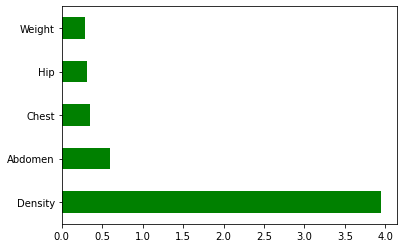

In [51]:
plotdata = pd.Series(mr,index=train.columns)
plotdata.nlargest(5).plot(kind='barh',color='green')

# Remove correletion

<AxesSubplot:>

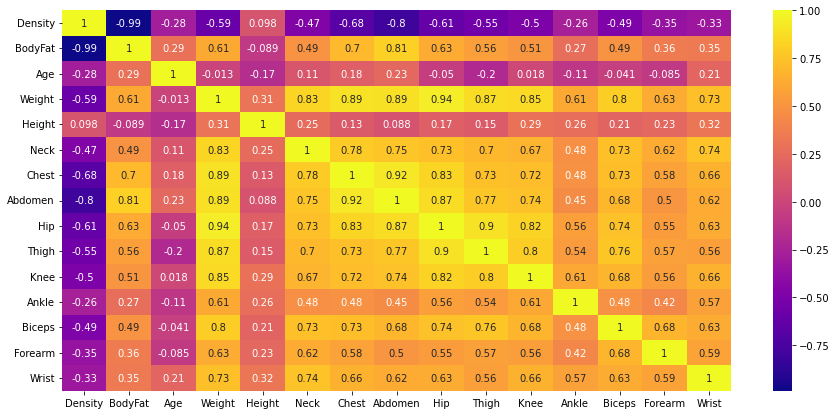

In [52]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [53]:
df.corr()['BodyFat']

Density   -0.987782
BodyFat    1.000000
Age        0.291458
Weight     0.612414
Height    -0.089495
Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
Name: BodyFat, dtype: float64

In [54]:
def correlation(df,threshold):
    colcor = set()

    cormat = df.corr()
    for i in range(len(cormat)):
        for j in range(i):


            if abs(cormat.iloc[i][j])>threshold:
                colname = cormat.columns[i]
                colcor.add(colname)
            
    return colcor

In [56]:
ans = correlation(train,threshold=0.85)
ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [57]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
temp = data[list(data.columns)]
info = pd.DataFrame()
info['VIF'] = [variance_inflation_factor(temp.values,i) for i in range(temp.shape[1])]
info['Column']= temp.columns
info

,VIF,Column
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [59]:
cols1 = list(series.nlargest(5).index)
cols2 = list(plotdata.nlargest(5).index)

cols1,cols2

(['Density', 'Abdomen', 'Chest', 'Weight', 'Hip'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

# model with cols1

In [122]:
totrain = train[cols1]
totrain.head()

,Density,Abdomen,Chest,Weight,Hip
0,1.0708,85.2,93.1,154.25,94.5
1,1.0853,83.0,93.6,173.25,98.7
2,1.0414,87.9,95.8,154.00,99.2
3,1.0751,86.4,101.8,184.75,101.2
4,1.0340,100.0,97.3,184.25,101.9


In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics,tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [104]:
x_train, x_test, y_train, y_test = train_test_split(totrain, test, test_size=0.2)
x_train.shape,x_test.shape

((201, 5), (51, 5))

[Text(405.061794465859, 364.66499999999996, 'X[0] <= 1.054\nsquared_error = 66.785\nsamples = 201\nvalue = 19.631'),
 Text(170.534140969163, 332.955, 'X[0] <= 1.036\nsquared_error = 22.135\nsamples = 100\nvalue = 26.381'),
 Text(60.37830396475771, 301.245, 'X[0] <= 1.024\nsquared_error = 6.952\nsamples = 35\nvalue = 31.891'),
 Text(17.51431718061674, 269.53499999999997, 'X[0] <= 1.016\nsquared_error = 4.31\nsamples = 8\nvalue = 35.7'),
 Text(7.3744493392070485, 237.825, 'X[2] <= 116.85\nsquared_error = 1.0\nsamples = 2\nvalue = 39.1'),
 Text(3.6872246696035242, 206.115, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(11.061674008810574, 206.115, 'squared_error = 0.0\nsamples = 1\nvalue = 40.1'),
 Text(27.654185022026432, 237.825, 'X[2] <= 117.25\nsquared_error = 0.276\nsamples = 6\nvalue = 34.567'),
 Text(18.43612334801762, 206.115, 'X[1] <= 110.45\nsquared_error = 0.122\nsamples = 2\nvalue = 33.95'),
 Text(14.748898678414097, 174.405, 'squared_error = 0.0\nsamples = 1\nvalue 

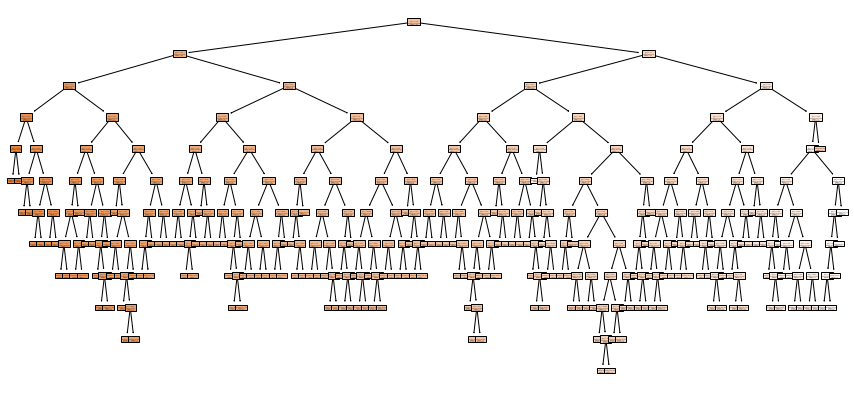

In [105]:
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(reg,filled=True)

In [106]:
path = reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha = path.ccp_alphas

In [107]:
Alphalist = []
for i in range(len(ccp_alpha)):
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    reg.fit(x_train,y_train)
    Alphalist.append(reg)

In [108]:
testscore = [Alphalist[i].score(x_test,y_test) for i in range(len(Alphalist))]
trainscore = [Alphalist[i].score(x_train,y_train) for i in range(len(Alphalist))]

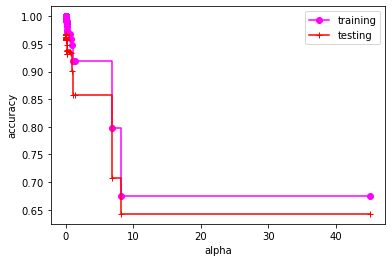

In [109]:
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,trainscore,marker='o',color='magenta',label='training',drawstyle='steps-post')
plt.plot(ccp_alpha,testscore,marker='+',color='red',label='testing',drawstyle='steps-post')
plt.legend()
plt.show()

In [111]:
# normal approach

clf =DecisionTreeRegressor(ccp_alpha=1)
clf.fit(x_train,y_train)
print(f'Decision tree : {metrics.r2_score(y_test, clf.predict(x_test))}')

rf = RandomForestRegressor(ccp_alpha=1)
rf.fit(x_train,y_train)
print(f'Random forest : {metrics.r2_score(y_test, rf.predict(x_test))}')


Decision tree : 0.8904108381805691
Random forest : 0.921675955477877


# Hyperparameter tuning

In [112]:
#[1,2,2.5,3,3.5,4,5]
params = {
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(1,1200,10)],
            'criterion': ['mse', 'mae'],
            'max_depth': [int(x) for x in np.linspace(1,30,5)],
            'min_samples_split': [2,5,10,12],
            'min_samples_leaf': [2,5,10,12],
            'max_features': ['auto','sqrt'],
            'ccp_alpha': [x for x in np.linspace(0.50,1.25,5)],
        }

    },
    'DecisionTree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion': ['mse', 'mae'],
            'splitter': ['best','random'],
            'min_samples_split': [2,5,10,12],
            'min_samples_leaf': [2,5,10,12],
            'max_features': ['auto','sqrt'],
            'ccp_alpha': [x for x in np.linspace(0.50,1.25,5)],
        }

    },
    'SVM':{
        'model': SVR(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'max_iter':[int(x) for x in np.linspace(1,250,10)],
        }

    }
}

In [113]:
scores =[]
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'], 
                cv=5, n_jobs=-1, n_iter=10,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)
    scores.append({
        'model_name': modelname,
        'best_score_':clf.best_score_,
        'best_estimator_':clf.best_estimator_
    })


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error

In [114]:
scoresdf= pd.DataFrame(scores)

In [115]:
scoresdf

,model_name,best_score_,best_estimator_
0,RandomForest,-2.582589,"(DecisionTreeRegressor(ccp_alpha=0.6875, max_d..."
1,DecisionTree,-4.145894,"DecisionTreeRegressor(ccp_alpha=0.6875, criter..."
2,SVM,-41.341620,"SVR(max_iter=222, tol=0.025)"


In [116]:
scores[0]['best_estimator_']

RandomForestRegressor(ccp_alpha=0.6875, criterion='mse', max_depth=15,
                      min_samples_leaf=5, min_samples_split=5,
                      n_estimators=134)

In [117]:
rf = scores[0]['best_estimator_']
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(metrics.r2_score(y_test,y_pred))

0.9361348727869105


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


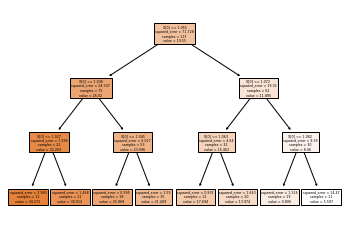

In [118]:
tree.plot_tree(rf.estimators_[0],filled=True);

In [123]:
totrainlist = np.array(totrain)
pred = []
for i in range(len(totrainlist)):
    pred.append(rf.predict([totrainlist[i]]))

totrain['Actual result'] = test
totrain['predicted result'] = np.array(pred)
totrain.head()

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have vali

,Density,Abdomen,Chest,Weight,Hip,Actual result,predicted result
0,1.0708,85.2,93.1,154.25,94.5,12.3,12.397250
1,1.0853,83.0,93.6,173.25,98.7,6.1,6.721766
2,1.0414,87.9,95.8,154.00,99.2,25.3,25.148207
3,1.0751,86.4,101.8,184.75,101.2,10.4,10.197981
4,1.0340,100.0,97.3,184.25,101.9,28.7,30.377853


In [128]:
totrain

,Density,Abdomen,Chest,Weight,Hip,Actual result,predicted result
0,1.0708,85.2,93.1,154.25,94.5,12.3,12.397250
1,1.0853,83.0,93.6,173.25,98.7,6.1,6.721766
2,1.0414,87.9,95.8,154.00,99.2,25.3,25.148207
3,1.0751,86.4,101.8,184.75,101.2,10.4,10.197981
4,1.0340,100.0,97.3,184.25,101.9,28.7,30.377853
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,134.25,88.8,11.0,10.271191
248,1.0236,105.0,108.5,201.00,104.5,33.6,33.038070
249,1.0328,111.5,111.1,186.75,101.7,29.3,30.423015
250,1.0399,101.3,108.3,190.75,97.8,26.0,25.323048


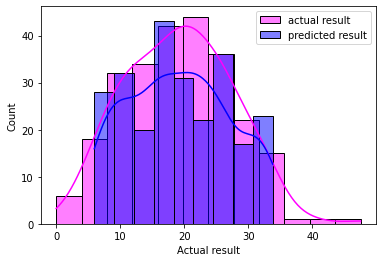

In [130]:
sn.histplot(totrain['Actual result'],kde=True,label='actual result',color='magenta')
sn.histplot(totrain['predicted result'],kde=True,label='predicted result',color='blue')
plt.legend()
plt.show()


In [132]:
cols2

['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']

In [141]:
totrain2 = train[cols2]
x_train, x_test, y_train, y_test = train_test_split(totrain2, test, test_size=0.2)
x_train.shape,x_test.shape

((201, 5), (51, 5))

In [144]:
rf2 = scores[0]['best_estimator_']
rf2.fit(x_train,y_train)

y_pred = rf2.predict(x_test)

print(metrics.r2_score(y_test,y_pred))

0.9216567785076203


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [145]:
totrainlist = np.array(totrain2)
pred = []
for i in range(len(totrainlist)):
    pred.append(rf2.predict([totrainlist[i]]))

totrain2['Actual result'] = test
totrain2['predicted result'] = np.array(pred)
totrain2.head()

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have vali

,Density,Abdomen,Chest,Hip,Weight,Actual result,predicted result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.635829
1,1.0853,83.0,93.6,98.7,173.25,6.1,6.644725
2,1.0414,87.9,95.8,99.2,154.00,25.3,24.880117
3,1.0751,86.4,101.8,101.2,184.75,10.4,10.021613
4,1.0340,100.0,97.3,101.9,184.25,28.7,28.559245


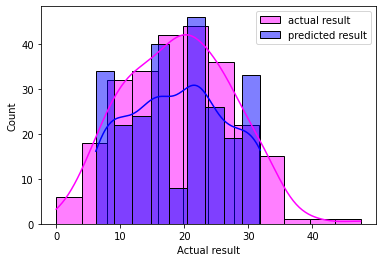

In [146]:
sn.histplot(totrain2['Actual result'],kde=True,label='actual result',color='magenta')
sn.histplot(totrain2['predicted result'],kde=True,label='predicted result',color='blue')
plt.legend()
plt.show()

In [137]:
totrain3 = df[['Density','Abdomen','Chest','Hip','Weight','Thigh','Knee']]
totrain3.head()

,Density,Abdomen,Chest,Hip,Weight,Thigh,Knee
0,1.0708,85.2,93.1,94.5,154.25,59.0,37.3
1,1.0853,83.0,93.6,98.7,173.25,58.7,37.3
2,1.0414,87.9,95.8,99.2,154.00,59.6,38.9
3,1.0751,86.4,101.8,101.2,184.75,60.1,37.3
4,1.0340,100.0,97.3,101.9,184.25,63.2,42.2


In [139]:
x_train, x_test, y_train, y_test = train_test_split(totrain3, test, test_size=0.2)
x_train.shape,x_test.shape

rf = scores[0]['best_estimator_']
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(metrics.r2_score(y_test,y_pred))

totrainlist = np.array(totrain3)
pred = []
for i in range(len(totrainlist)):
    pred.append(rf.predict([totrainlist[i]]))

totrain3['Actual result'] = test
totrain3['predicted result'] = np.array(pred)
totrain3.head()

/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.9793290182829575


/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/sergekeita/opt/anaconda3/envs/DogBreed/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have vali

,Density,Abdomen,Chest,Hip,Weight,Thigh,Knee,Actual result,predicted result
0,1.0708,85.2,93.1,94.5,154.25,59.0,37.3,12.3,11.722656
1,1.0853,83.0,93.6,98.7,173.25,58.7,37.3,6.1,6.876429
2,1.0414,87.9,95.8,99.2,154.00,59.6,38.9,25.3,25.775842
3,1.0751,86.4,101.8,101.2,184.75,60.1,37.3,10.4,10.760845
4,1.0340,100.0,97.3,101.9,184.25,63.2,42.2,28.7,29.019188


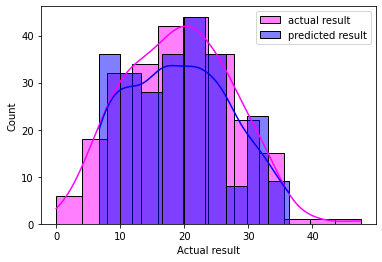

In [140]:
sn.histplot(totrain3['Actual result'],kde=True,label='actual result',color='magenta')
sn.histplot(totrain3['predicted result'],kde=True,label='predicted result',color='blue')
plt.legend()
plt.show()

In [148]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))